<a href="https://www.kaggle.com/code/vizeno/heart-attack-prediction-analysis-multi-models?scriptVersionId=162292830" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="width: 100%; text-align: center;">
    <div style="background-color:#E1D6FF; padding: 0.5rem;">
        <h1 style="font-weight: bold; font-size: 2.5em; color: blue;">Heart Attack Prediction</h1>
   </div>

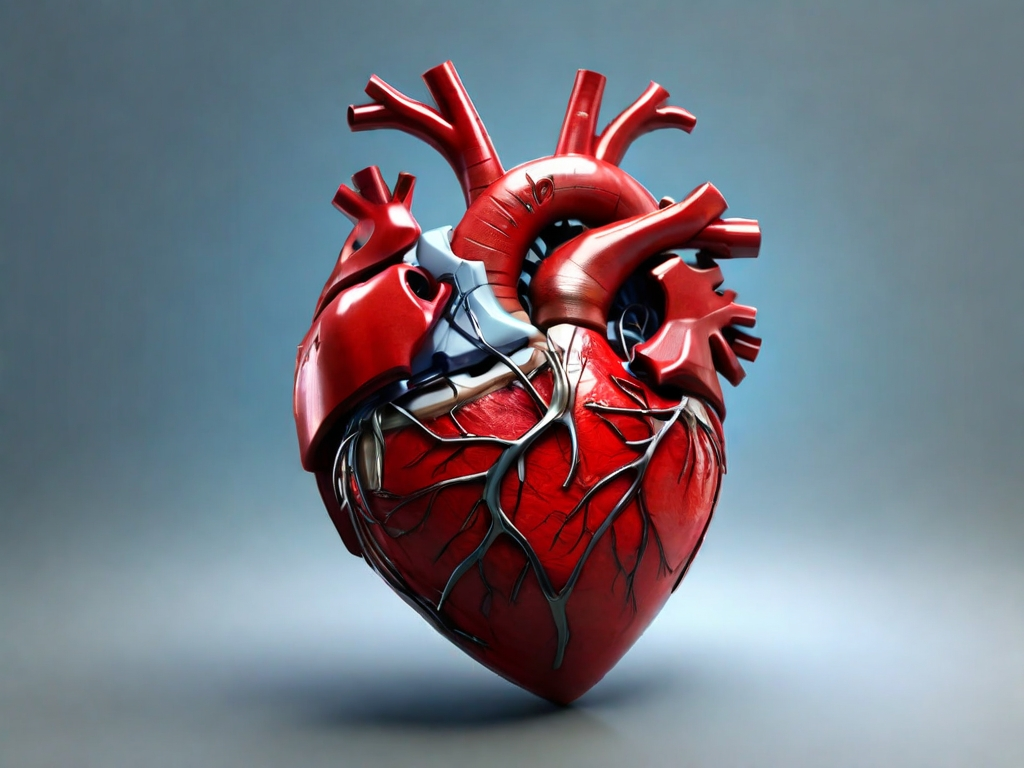

<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">Data Dictionary</h1>
</div>

# Dataset info

<div style="font-size: 1.3em;">

<span style="color: blue;">Age:</span> Age of the patient.
<br>
    
<span style="color: blue;">Sex:</span> Sex of the patient.
<br>

<span style="color: blue;">exang:</span> Exercise-induced angina (1 = yes; 0 = no).
<br>

    Angina = Chest pain

<span style="color: blue;">ca:</span> Number of major vessels (0-3).
The variable "ca" with values ranging from 0 to 3 represents the number of major blood vessels (coronary arteries) that are colored or visualized during the fluoroscopy procedure. Each value corresponds to a different degree of vessel involvement:

ca = 0: Indicates that there is no significant coloration of the vessels, suggesting a potential absence of major vessel blockages.

ca = 1: Implies that one major vessel is colored, indicating a partial blockage or disease in one of the coronary arteries.

ca = 2: Suggests that two major vessels are colored, signifying a more extensive blockage or disease involving multiple coronary arteries.

ca = 3: Indicates that three major vessels are colored, suggesting a severe blockage or disease affecting most of the coronary arteries.
<br>

<span style="color: blue;">cp:</span> Chest pain type.
    <ul>
<li>Typical Angina (Value 1): Substernal discomfort or pain, often squeezing or heaviness, triggered by exertion, indicative of coronary artery disease.</li>

<li>Atypical Angina (Value 2): Non-classic symptoms, variations in pain characteristics, may not be clearly associated with physical exertion.</li>

<li>Non-Anginal Pain (Value 3): Sharp or stabbing pain, not typical of angina, may have non-cardiac causes like musculoskeletal or gastrointestinal issues.</li>

<li>Asymptomatic (Value 4): Absence of chest pain or discomfort, patient reports no symptoms related to chest pain, requiring further assessment of other risk factors.</li>
    </ul>
<br>

<span style="color: blue;">trtbps:</span> Resting blood pressure (in mm Hg).
<br>

<span style="color: blue;">chol:</span> Cholesterol in mg/dl fetched via BMI sensor.
<br>

<span style="color: blue;">fbs:</span> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
<br>

<span style="color: blue;">rest_ecg:</span> Resting electrocardiographic results.
    <ul>
        <li>Value 0: Normal</li>
        <li>Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</li>
        <li>Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
    </ul>
<br>

<span style="color: blue;">thalach:</span> Maximum heart rate achieved.
<br>

<span style="color: blue;">target:</span> 0 = Less chance of a heart attack, 1 = More chance of a heart attack.

</div>


# ECG ABNORMALITIES GRAPH (to display rest_ecg feature samples)

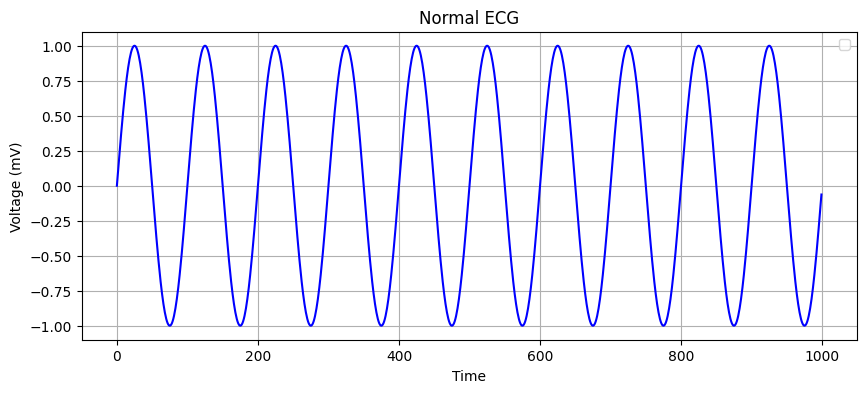

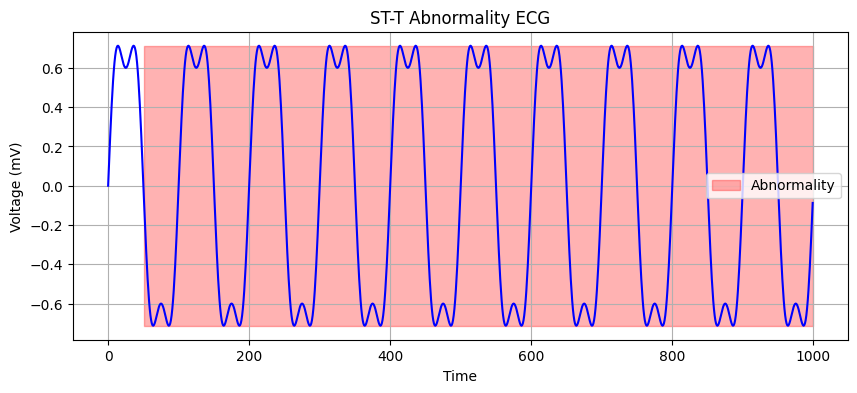

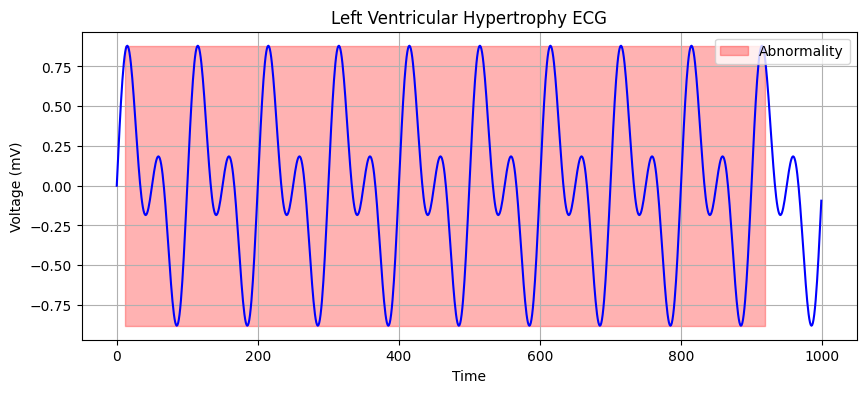

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot ECG graph with abnormality highlighted
def plot_abnormal_ecg(signal, abnormal_indices, title, xlabel, ylabel):
    plt.figure(figsize=(10, 4))
    plt.plot(signal, color='blue')
    
    # Highlight abnormal parts in red
    if abnormal_indices.size > 0:
        plt.fill_between(abnormal_indices, min(signal), max(signal), color='red', alpha=0.3, label='Abnormality')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

# Generate time axis
time = np.arange(0, 10, 0.01)

# 1) Normal ECG
normal_ecg = np.sin(2 * np.pi * 1 * time)
plot_abnormal_ecg(normal_ecg, np.array([]), 'Normal ECG', 'Time', 'Voltage (mV)')

# 2) ST-T Abnormality
stt_abnormality_ecg = 0.8 * np.sin(2 * np.pi * 1 * time) + 0.2 * np.sin(2 * np.pi * 3 * time)
abnormal_indices_stt = np.where(stt_abnormality_ecg < 0)[0]
plot_abnormal_ecg(stt_abnormality_ecg, abnormal_indices_stt, 'ST-T Abnormality ECG', 'Time', 'Voltage (mV)')

# 3) Left Ventricular Hypertrophy
lvh_ecg = 0.5 * np.sin(2 * np.pi * 1 * time) + 0.5 * np.sin(2 * np.pi * 2 * time)
abnormal_indices_lvh = np.where(lvh_ecg > 0.8)[0]
plot_abnormal_ecg(lvh_ecg, abnormal_indices_lvh, 'Left Ventricular Hypertrophy ECG', 'Time', 'Voltage (mV)')


<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">Libraries</h1>
</div>

# importing libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import seaborn as sns
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [3]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

<div style="width: 100%; text-align: center;">
    <div style="background-color:#E1D6FF; padding: 0.5rem;">
        <h1 style="font-weight: bold; font-size: 2.5em; color: blue;">EDA</h1>
   </div>

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


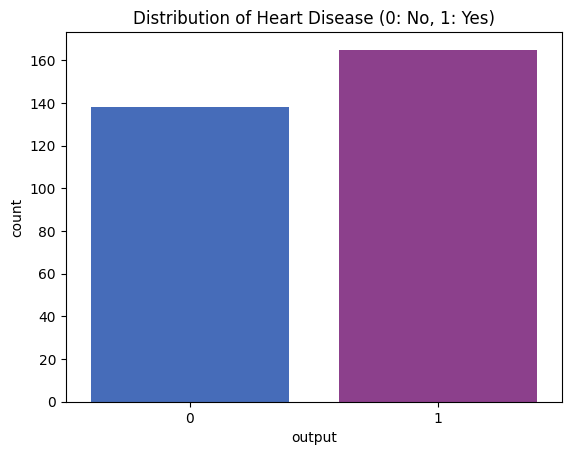

In [6]:
sns.countplot(x='output', data=df, palette=['#3366cc', '#993399'])
plt.title('Distribution of Heart Disease (0: No, 1: Yes)')
plt.show()

<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">Correlation Matrix</h1>
</div>

# Correlation plot

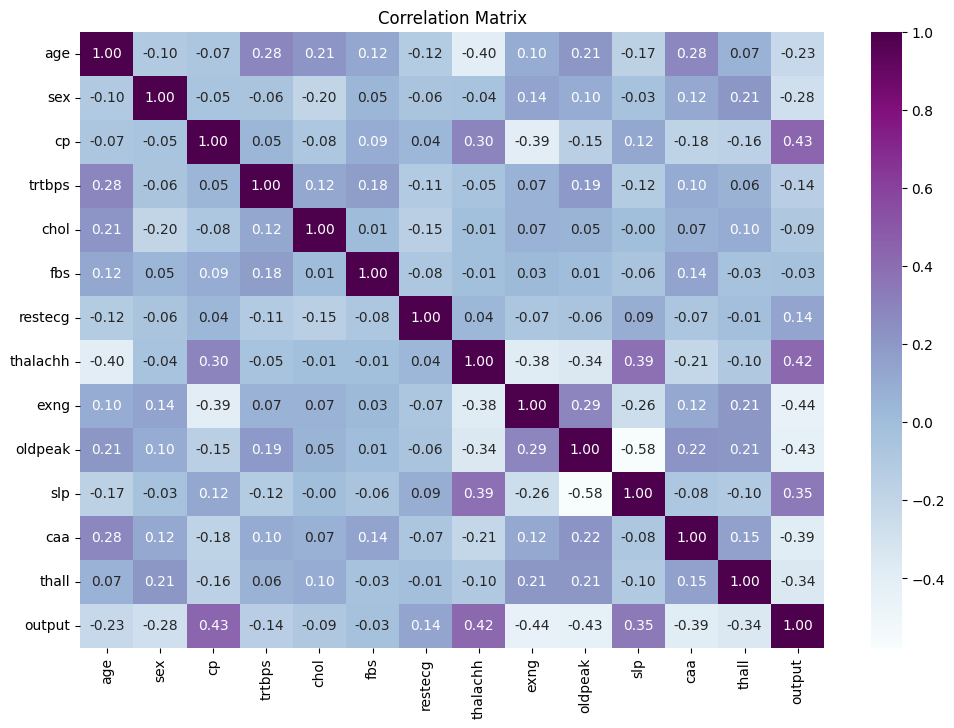

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Feature Distribution

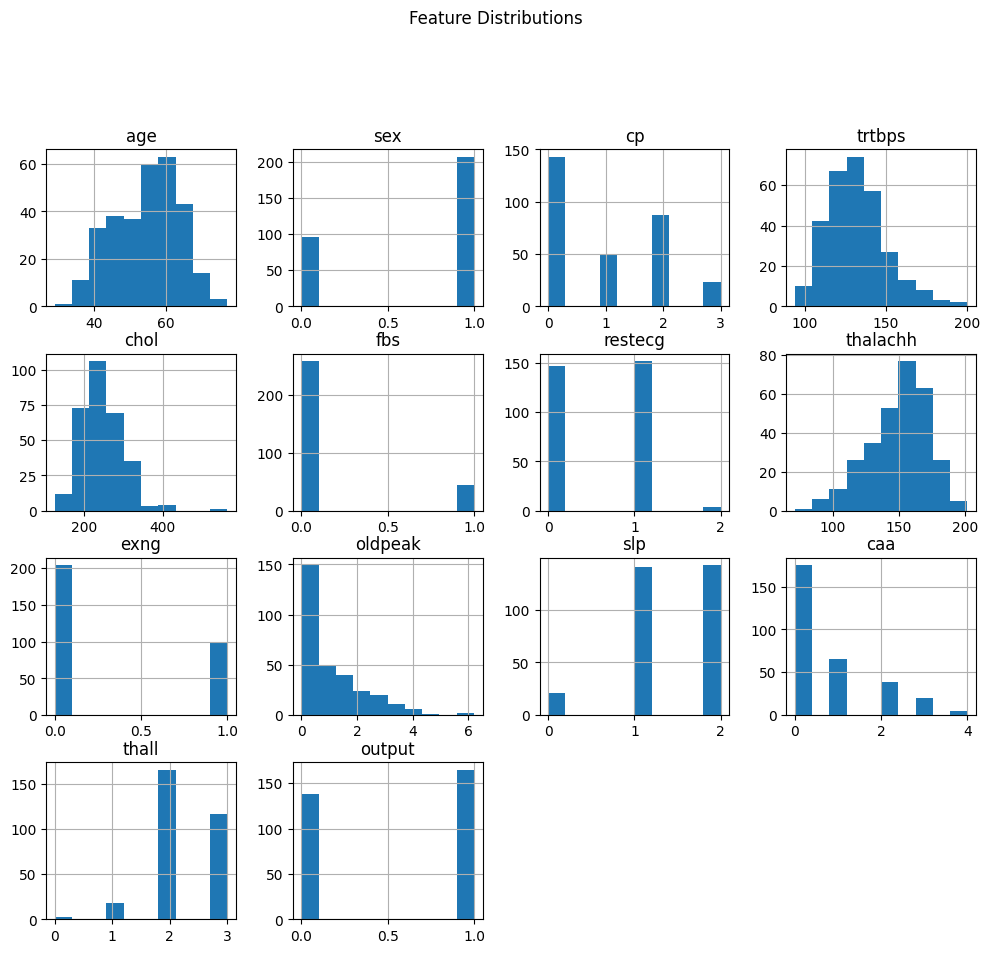

In [8]:
df.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions', x=0.5, y=1.02, ha='center',fontsize='large')
plt.show()

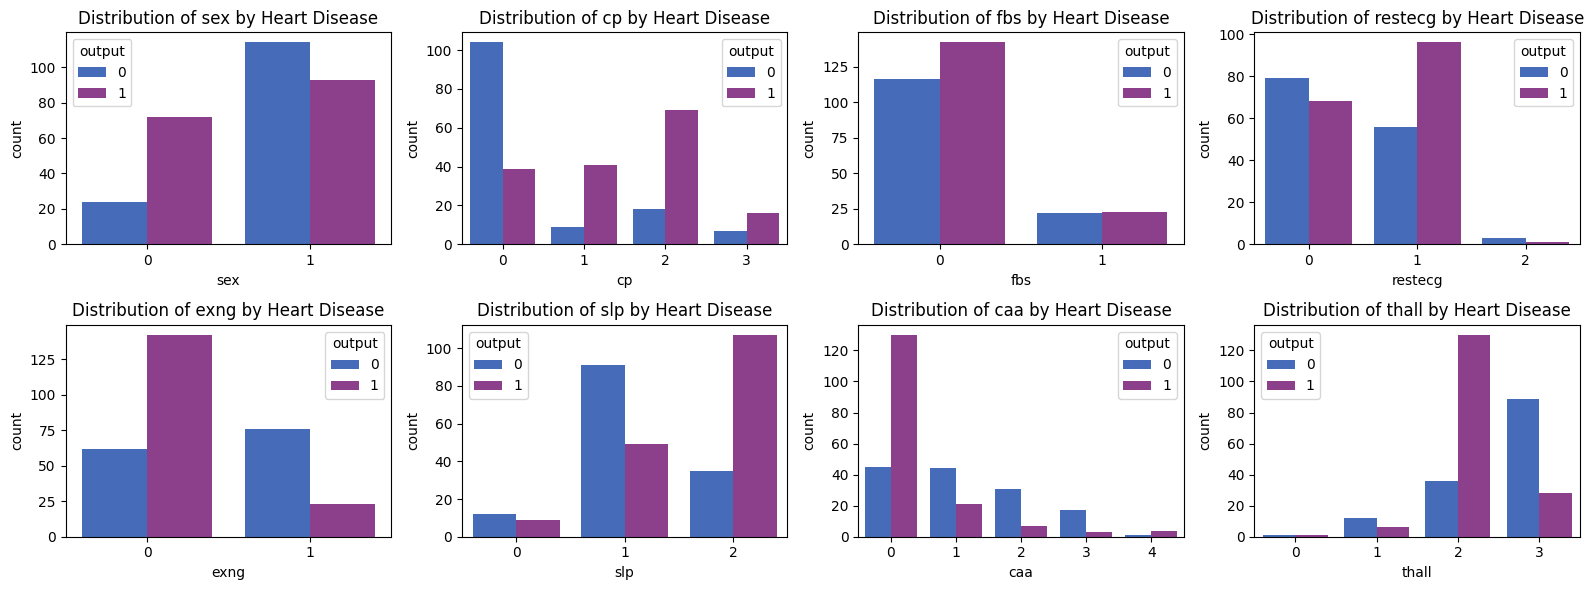

In [9]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6))

for i, feature in enumerate(categorical_features):
    row_index = i // num_cols
    col_index = i % num_cols

    sns.countplot(x=feature, hue='output', data=df, palette=['#3366cc', '#993399'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Distribution of {feature} by Heart Disease')

plt.tight_layout()
plt.show()


# Age distribution

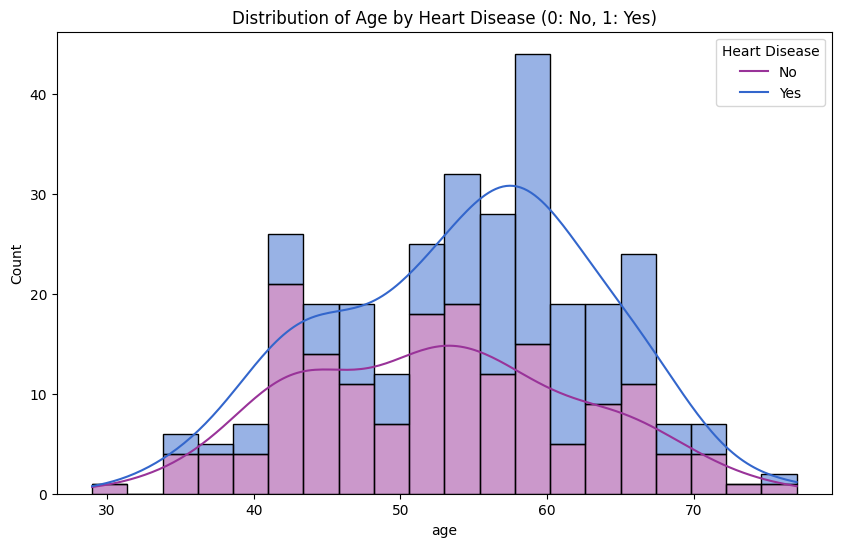

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=df, bins=20, kde=True, hue='output', multiple='stack', palette=['#3366cc', '#993399'])
plt.title('Distribution of Age by Heart Disease (0: No, 1: Yes)')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Noise identification

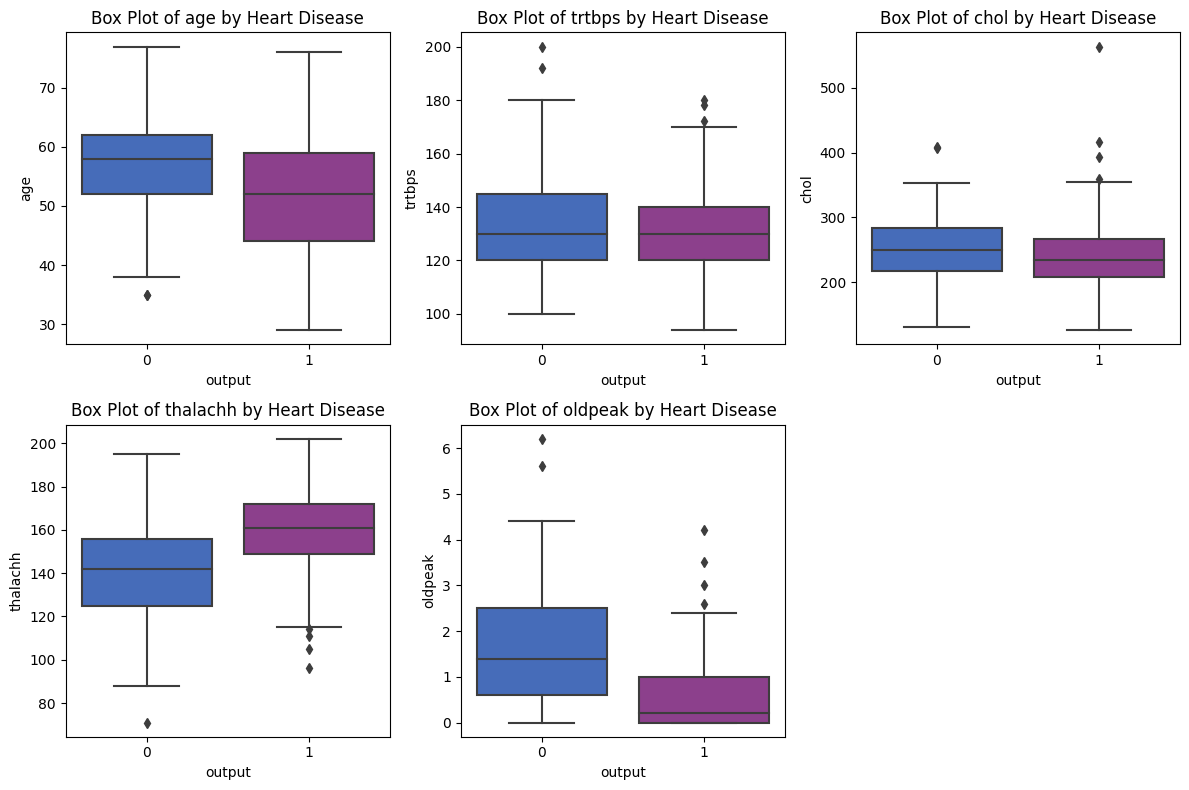

In [11]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='output', y=feature, data=df, palette=['#3366cc', '#993399'])
    plt.title(f'Box Plot of {feature} by Heart Disease')

plt.tight_layout()
plt.show()

In [12]:
df = df[df['chol'] <= 500]

* Remove value where cholestrol is over 500

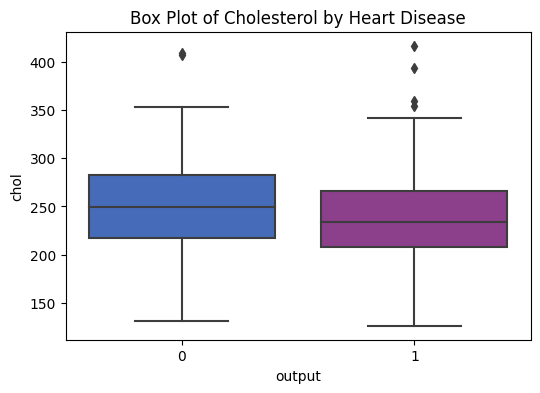

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='output', y='chol', data=df, palette=['#3366cc', '#993399'])
plt.title('Box Plot of Cholesterol by Heart Disease')
plt.show()


In [14]:
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div style="width: 100%; text-align: center;">
    <div style="background-color:#E1D6FF; padding: 0.5rem;">
        <h1 style="font-weight: bold; font-size: 2.5em; color: blue;">Models</h1>
   </div>

<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">Logistic Regression</h1>
</div>

Logistic Regression Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



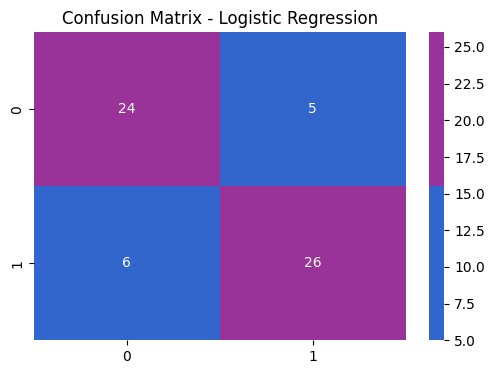

In [15]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred = model_lr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">Random Forest</h1>
</div>

Random Forest Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



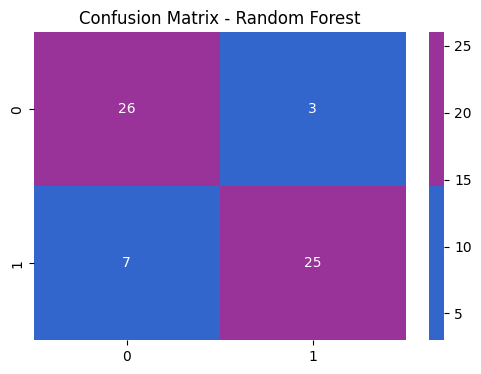

In [16]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - Random Forest')
plt.show()


<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">Support Vector Machine</h1>
</div>

SVM Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



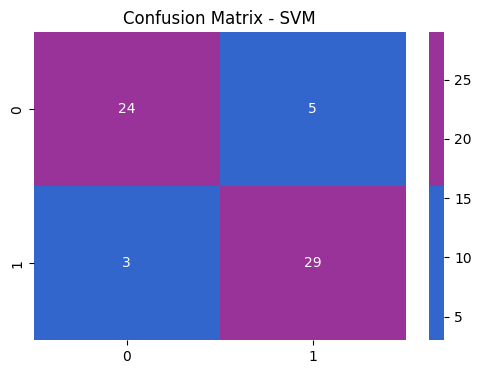

In [17]:
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - SVM')
plt.show()

<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">KNN</h1>
</div>

KNN Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



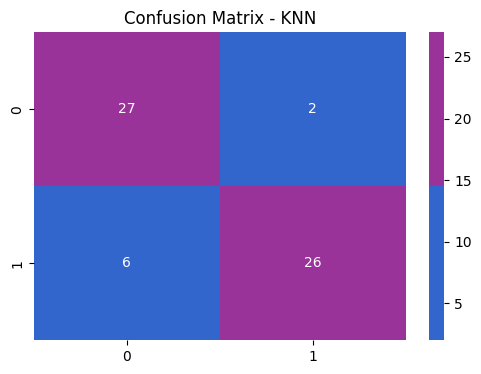

In [18]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - KNN')
plt.show()

<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">Naive Bayes</h1>
</div>

Naive Bayes Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



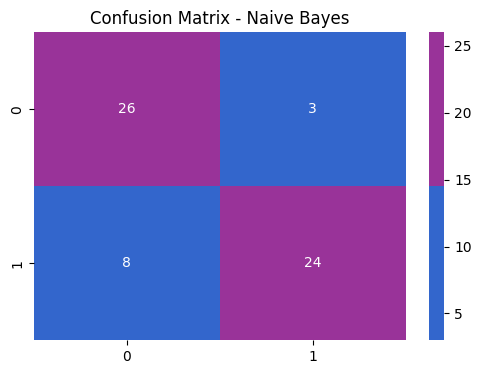

In [19]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

y_pred_nb = model_nb.predict(X_test_scaled)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_nb))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">Ada Boost Classifier</h1>
</div>

AdaBoost Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



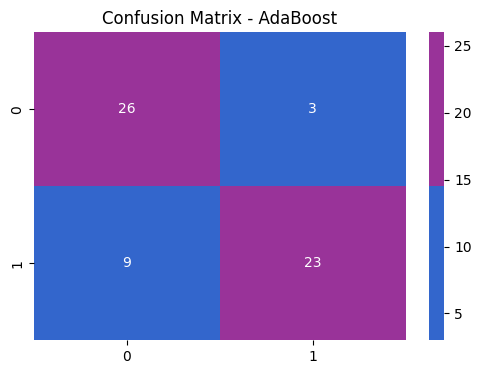

In [20]:
model_adaboost = AdaBoostClassifier(random_state=42)
model_adaboost.fit(X_train_scaled, y_train)


y_pred_adaboost = model_adaboost.predict(X_test_scaled)


accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f'AdaBoost Accuracy: {accuracy_adaboost:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_adaboost))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - AdaBoost')
plt.show()

<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">XGBOOST</h1>
</div>

XGBoost Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



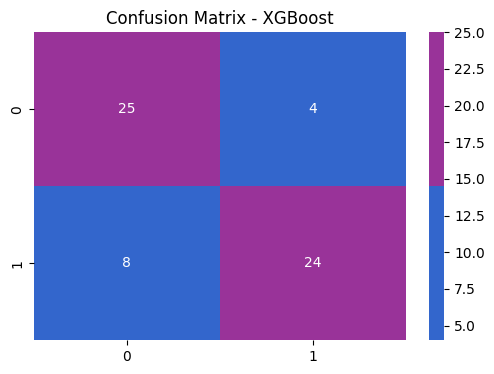

In [21]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_scaled, y_train)

y_pred_xgb = model_xgb.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - XGBoost')
plt.show()

<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">Multi Layer Perceptron</h1>
</div>

Neural Network Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



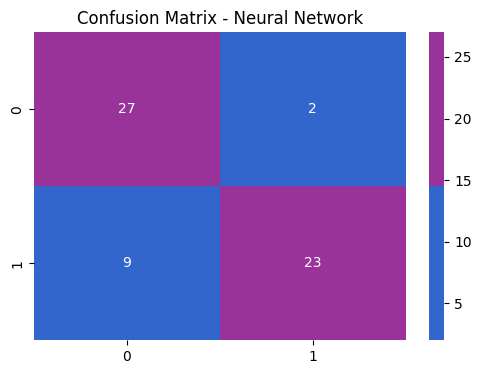

In [22]:
model_nn = MLPClassifier(random_state=42, max_iter=500)
model_nn.fit(X_train_scaled, y_train)

y_pred_nn = model_nn.predict(X_test_scaled)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Accuracy: {accuracy_nn:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_nn))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - Neural Network')
plt.show()

# Models Summary

In [23]:

models = ['XGBoost', 'Neural Network', 'AdaBoost', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy_xgb, accuracy_nn, accuracy_adaboost, accuracy_nb, accuracy_knn, accuracy_svm, accuracy_rf, accuracy]

table = PrettyTable()
table.field_names = ["Model", "Accuracy"]

color_codes = {
    'XGBoost': '\033[91m',  # Red
    'Neural Network': '\033[93m',  # Yellow
    'AdaBoost': '\033[92m',  # Green
    'Naive Bayes': '\033[94m',  # Blue
    'KNN': '\033[33m',  # Orange
    'SVM': '\033[95m',  # Purple
    'Random Forest': '\033[30m',  # Black
    'Logistic Regression': '\033[95m'  # Pink
}

for model, accuracy in zip(models, accuracies):

    colored_model = f'{color_codes[model]}{model}\033[0m'
    colored_accuracy = f'{color_codes[model]}{accuracy:.2%}\033[0m'
    table.add_row([colored_model, colored_accuracy])

print(table)


+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
|       XGBoost       |  80.33%  |
|    Neural Network   |  81.97%  |
|       AdaBoost      |  80.33%  |
|     Naive Bayes     |  81.97%  |
|         KNN         |  86.89%  |
|         SVM         |  86.89%  |
|    Random Forest    |  83.61%  |
| Logistic Regression |  81.97%  |
+---------------------+----------+


<div style="background-color: #E1D6FF; padding: 0.5rem;">
    <h1 style="font-weight: bold; font-size: 2em; color: blue;">Thanks for viewing my notebook! ❤️ Feel free to give suggestions. </h1>
</div>